In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data
Y=iris.target
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [15]:
model = SVC()

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.4,random_state=3)

In [16]:
model.fit(X_train,Y_train)

/anaconda2/envs/myenv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
from sklearn import metrics

In [18]:
pred = model.predict(X_test)

In [19]:
expect=Y_test
print (metrics.accuracy_score(expect,pred))

0.9666666666666667


In [20]:
from sklearn import svm

In [21]:
X=iris.data[:,:2]
Y=iris.target

In [23]:
C=1.0
svc=svm.SVC(kernel='linear',C=C).fit(X,Y)

In [24]:
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [25]:
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

/anaconda2/envs/myenv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
lin_svc=svm.LinearSVC(C=C).fit(X,Y)

/anaconda2/envs/myenv/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
h=0.02

x_min=X[:,0].min() - 1
x_max=X[:,0].max() + 1

In [28]:
y_min=X[:,1].min() - 1
y_max=X[:,1].max() - 1

In [29]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [30]:
title=['SVC with linear kernel',
       'LinearSVC (linear kernel)',
       'SVC with RBF kernel',
       'SVC with polynomial (degree 3) kernel']

/anaconda2/envs/myenv/lib/python3.6/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda2/envs/myenv/lib/python3.6/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda2/envs/myenv/lib/python3.6/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/anaconda2/envs/myenv/lib/python3.6/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


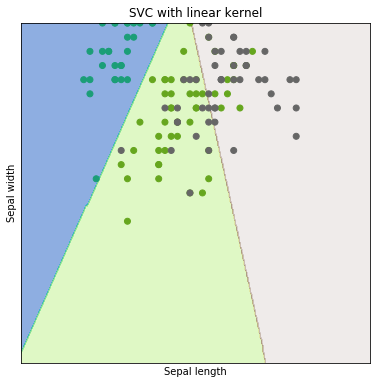

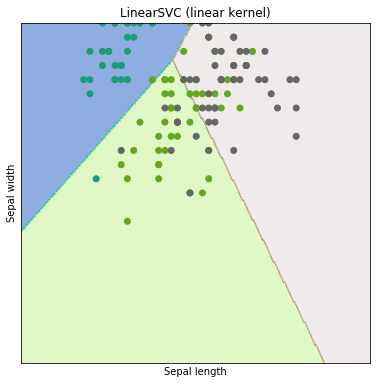

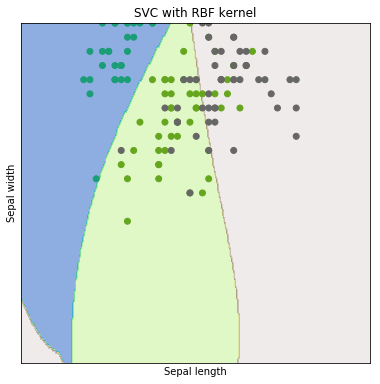

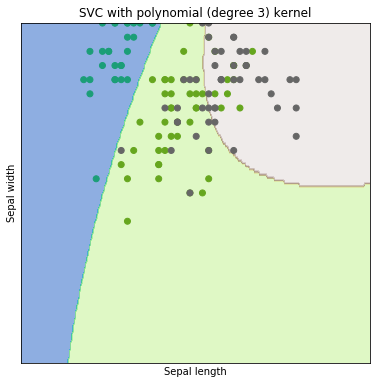

In [32]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(title[i])
    